In [1]:
import os
data_path = "C:/Users/black/OneDrive/Masaüstü/Project/archive/train/"
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/black/OneDrive/Masaüstü/Project/archive/train/Acne and Rosacea Photos\07Acne081101.jpg
C:/Users/black/OneDrive/Masaüstü/Project/archive/train/Acne and Rosacea Photos\07AcnePittedScars.jpg
C:/Users/black/OneDrive/Masaüstü/Project/archive/train/Acne and Rosacea Photos\07AcnePittedScars1.jpg
C:/Users/black/OneDrive/Masaüstü/Project/archive/train/Acne and Rosacea Photos\07PerioralDermEye.jpg
C:/Users/black/OneDrive/Masaüstü/Project/archive/train/Acne and Rosacea Photos\07PerioralDermNose.jpg
C:/Users/black/OneDrive/Masaüstü/Project/archive/train/Acne and Rosacea Photos\07PerioralDermq.jpg
C:/Users/black/OneDrive/Masaüstü/Project/archive/train/Acne and Rosacea Photos\07PerioralSteroid1.jpg
C:/Users/black/OneDrive/Masaüstü/Project/archive/train/Acne and Rosacea Photos\07PerlecheAccutane.jpg
C:/Users/black/OneDrive/Masaüstü/Project/archive/train/Acne and Rosacea Photos\07Rhinophyma1.jpg
C:/Users/black/OneDrive/Masaüstü/Project/archive/train/Acne and Rosacea Photos\07Rhinophyma1a.jpg


In [2]:
os.listdir(data_path)

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [3]:
total_counts = 0
weights_ = dict()
for class_ in os.listdir(data_path):
    count_ = 0
    for photo in os.listdir(data_path + class_):
        count_ += 1
        total_counts += 1
    print(str(class_) + " has " + str(count_) + " photos")
    print(str(class_) + " has " + str((count_/total_counts) * 100) + "% of photos")
    weights_[class_] = 1 - (count_/total_counts)  

Acne and Rosacea Photos has 840 photos
Acne and Rosacea Photos has 100.0% of photos
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions has 1149 photos
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions has 57.76772247360482% of photos
Atopic Dermatitis Photos has 489 photos
Atopic Dermatitis Photos has 19.73365617433414% of photos
Bullous Disease Photos has 448 photos
Bullous Disease Photos has 15.311004784688995% of photos
Cellulitis Impetigo and other Bacterial Infections has 288 photos
Cellulitis Impetigo and other Bacterial Infections has 8.9607965152458% of photos
Eczema Photos has 1235 photos
Eczema Photos has 27.75904697684873% of photos
Exanthems and Drug Eruptions has 404 photos
Exanthems and Drug Eruptions has 8.324747578817227% of photos
Hair Loss Photos Alopecia and other Hair Diseases has 239 photos
Hair Loss Photos Alopecia and other Hair Diseases has 4.69363707776905% of photos
Herpes HPV and other STDs Photos has 405 photos
Herpes HPV and

In [4]:
import pandas as pd
import numpy as np 
data = pd.DataFrame()
for class_ in os.listdir(data_path):
    temp = pd.DataFrame()
    temp['path'] = np.nan
    temp['category'] = class_
    i = 0
    for photo in os.listdir(data_path + class_):
        temp.loc[i, 'path'] = data_path + class_ + "/" + photo
        temp.loc[i, 'category'] =class_
        i += 1
    data = pd.concat([data, temp], ignore_index=True)
    del temp

In [5]:
data = data.sample(frac=1)
data.reset_index(drop=True, inplace=True)
data.head()

,path,category
0,C:/Users/black/OneDrive/Masaüstü/Project/archi...,Cellulitis Impetigo and other Bacterial Infect...
1,C:/Users/black/OneDrive/Masaüstü/Project/archi...,Eczema Photos
2,C:/Users/black/OneDrive/Masaüstü/Project/archi...,Psoriasis pictures Lichen Planus and related d...
3,C:/Users/black/OneDrive/Masaüstü/Project/archi...,Scabies Lyme Disease and other Infestations an...
4,C:/Users/black/OneDrive/Masaüstü/Project/archi...,Eczema Photos


In [7]:
from PIL import Image
# Resim boyutlarını alacak bir fonksiyon yazın
def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

# DataFrame'e resim boyutlarını ekleyin
data['image_size'] = data['path'].apply(get_image_size)

# Genişlik ve yükseklik sütunlarını ekleyin
data['width'] = data['image_size'].apply(lambda x: x[0])
data['height'] = data['image_size'].apply(lambda x: x[1])

# DataFrame'den boyutları çıkarın ve basın
print(data.head())

                                                path  \
0  C:/Users/black/OneDrive/Masaüstü/Project/archi...   
1  C:/Users/black/OneDrive/Masaüstü/Project/archi...   
2  C:/Users/black/OneDrive/Masaüstü/Project/archi...   
3  C:/Users/black/OneDrive/Masaüstü/Project/archi...   
4  C:/Users/black/OneDrive/Masaüstü/Project/archi...   

                                            category  image_size  width  \
0  Cellulitis Impetigo and other Bacterial Infect...  (720, 480)    720   
1                                      Eczema Photos  (480, 720)    480   
2  Psoriasis pictures Lichen Planus and related d...  (720, 472)    720   
3  Scabies Lyme Disease and other Infestations an...  (720, 491)    720   
4                                      Eczema Photos  (720, 477)    720   

   height  
0     480  
1     720  
2     472  
3     491  
4     477  


In [14]:
data.head()

,path,category,image_size,width,height
0,C:/Users/black/OneDrive/Masaüstü/Project/archi...,Cellulitis Impetigo and other Bacterial Infect...,"(720, 480)",720,480
1,C:/Users/black/OneDrive/Masaüstü/Project/archi...,Eczema Photos,"(480, 720)",480,720
2,C:/Users/black/OneDrive/Masaüstü/Project/archi...,Psoriasis pictures Lichen Planus and related d...,"(720, 472)",720,472
3,C:/Users/black/OneDrive/Masaüstü/Project/archi...,Scabies Lyme Disease and other Infestations an...,"(720, 491)",720,491
4,C:/Users/black/OneDrive/Masaüstü/Project/archi...,Eczema Photos,"(720, 477)",720,477


In [15]:
from sklearn import model_selection
train_images, test_images = model_selection.train_test_split(data, test_size=0.2, random_state=0, stratify=data['category'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Ortalama genişlik ve yükseklik hesaplayın
avg_width = int(data['width'].mean())
avg_height = int(data['height'].mean())
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
)

val_datagen = ImageDataGenerator()

# Assuming train_images and test_images are DataFrames with 'path' and 'category' columns
# Using flow_from_dataframe to load images

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_images, 
        x_col='path',
        y_col='category',  
        target_size=(avg_width, avg_height),  # All images will be resized to 150x150
        batch_size=64,
        class_mode='categorical'
)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_dataframe(
        dataframe=test_images, 
        x_col='path',
        y_col='category',  
        target_size=(avg_width, avg_height),
        batch_size=64,
        class_mode='categorical'
)

Found 12445 validated image filenames belonging to 23 classes.
Found 3112 validated image filenames belonging to 23 classes.


In [20]:
from tensorflow.keras.models import Sequential
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda, GlobalAveragePooling2D
import keras.applications.xception as xception


IMAGE_CHANNELS = 3
IMAGE_SIZE = [avg_width, avg_height]
classes = len(os.listdir(data_path))
xception_layer = xception.Xception(include_top = False, input_shape = (avg_width, avg_height, IMAGE_CHANNELS), weights = 'imagenet')

# We don't want to train the imported weights
xception_layer.trainable = False


model = Sequential()
model.add(keras.Input(shape=(avg_width, avg_height, IMAGE_CHANNELS)))

#create a custom layer to apply the preprocessing
def xception_preprocessing(img):
  return xception.preprocess_input(img)

model.add(Lambda(xception_preprocessing))
model.add(xception_layer)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(classes, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 658, 544, 3)       0         
                                                                 
 xception (Functional)       (None, 21, 17, 2048)      20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 23)                11799     
                                                                 
Total params: 21922367 (83.63 MB)
Trainable params: 1060887 (4.05 MB)
Non-trainable params: 20861480 (79.58 MB)
__________

In [21]:
from keras.callbacks import EarlyStopping

batch_size = 64

# Erken durdurma callback'i
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğit
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size,
      callbacks=[early_stopping]
)

# En iyi modeli manuel olarak kaydet
model.save('best_model.keras')

Epoch 1/15
194/194 [==============================] - 6033s 31s/step - loss: 2.5793 - categorical_accuracy: 0.2402 - val_loss: 2.3958 - val_categorical_accuracy: 0.2969
Epoch 2/15
194/194 [==============================] - 5995s 31s/step - loss: 2.3437 - categorical_accuracy: 0.3010 - val_loss: 2.3343 - val_categorical_accuracy: 0.3141
Epoch 3/15
194/194 [==============================] - 6001s 31s/step - loss: 2.2622 - categorical_accuracy: 0.3285 - val_loss: 2.2698 - val_categorical_accuracy: 0.3262
Epoch 4/15
194/194 [==============================] - 5987s 31s/step - loss: 2.1949 - categorical_accuracy: 0.3481 - val_loss: 2.2000 - val_categorical_accuracy: 0.3438
Epoch 5/15
194/194 [==============================] - 6007s 31s/step - loss: 2.1431 - categorical_accuracy: 0.3573 - val_loss: 2.1735 - val_categorical_accuracy: 0.3610
Epoch 6/15
194/194 [==============================] - 5981s 31s/step - loss: 2.1061 - categorical_accuracy: 0.3690 - val_loss: 2.1445 - val_categorical_acc

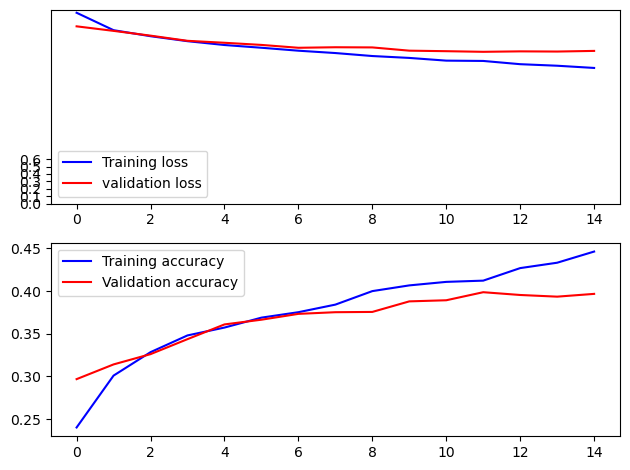

In [24]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_yticks(np.arange(0, 0.7, 0.1))
ax1.legend()

ax2.plot(history.history['categorical_accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_categorical_accuracy'], color='r',label="Validation accuracy")
ax2.legend()

legend = plt.legend(loc='best')
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 421ms/step
[0]
Acne and Rosacea Photos


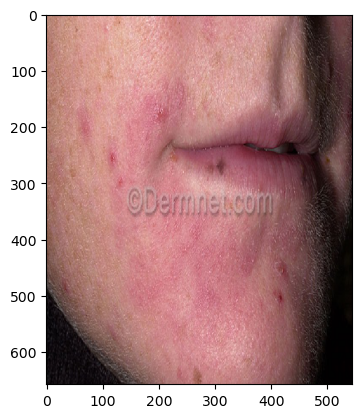

In [35]:
from tensorflow.keras.preprocessing import image

classes=['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']
image_path = "C:/Users/black/OneDrive/Masaüstü/Project/archive/test/Acne and Rosacea Photos/07SteroidPerioral1.jpg"
new_img = image.load_img(image_path, target_size=(avg_width, avg_height))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)